# How to become a data scientist!

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
data = pd.read_csv('../data/study_data.csv', sep=';')

## Understanding the Data

In [3]:
data.head()

,Date,Type,Platform,Units,Difficulty,Time Start,Time End,Temp1,Temp2
0,02/01/2022,Pairing,local,4,NaN,14:00,16:00,NaN,NaN
1,03/01/2022,Studying,datacamp,6,NaN,NaN,NaN,NaN,NaN
2,04/01/2022,Studying,datacamp,6,NaN,NaN,NaN,NaN,NaN
3,05/01/2022,Studying,datacamp,6,NaN,NaN,NaN,NaN,NaN
4,06/01/2022,Studying,datacamp,6,NaN,NaN,NaN,NaN,NaN


In [4]:
col_del = ['Difficulty', 'Temp1', 'Temp2']
data.drop(columns = col_del, inplace=True)

In [5]:
data.head()

,Date,Type,Platform,Units,Time Start,Time End
0,02/01/2022,Pairing,local,4,14:00,16:00
1,03/01/2022,Studying,datacamp,6,NaN,NaN
2,04/01/2022,Studying,datacamp,6,NaN,NaN
3,05/01/2022,Studying,datacamp,6,NaN,NaN
4,06/01/2022,Studying,datacamp,6,NaN,NaN


In [6]:
data['Date'] = pd.to_datetime(data.Date, format= '%d/%m/%Y')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        135 non-null    datetime64[ns]
 1   Type        134 non-null    object        
 2   Platform    134 non-null    object        
 3   Units       135 non-null    int64         
 4   Time Start  24 non-null     object        
 5   Time End    24 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 6.5+ KB


In [8]:
def sanitized_col_names(col_names: list) -> list:
    new_col_names = []
    for column in col_names:
        column = column.replace(' ', '_')
        column = column.lower()
        new_col_names.append(column)
    return new_col_names

In [9]:
data.columns = sanitized_col_names(data.columns)

In [10]:
data.head()

,date,type,platform,units,time_start,time_end
0,2022-01-02,Pairing,local,4,14:00,16:00
1,2022-01-03,Studying,datacamp,6,NaN,NaN
2,2022-01-04,Studying,datacamp,6,NaN,NaN
3,2022-01-05,Studying,datacamp,6,NaN,NaN
4,2022-01-06,Studying,datacamp,6,NaN,NaN


In [11]:
data.describe()

,units
count,135.000000
mean,7.059259
std,3.506418
min,0.000000
25%,4.000000
50%,6.000000
75%,10.000000
max,18.000000


## Plotting the data

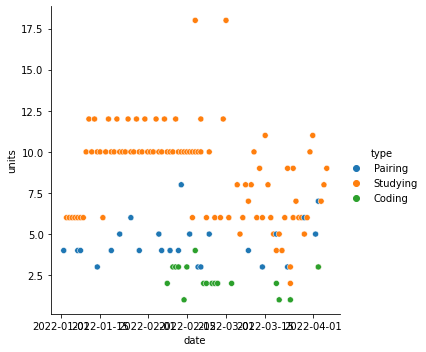

In [12]:
sns.relplot(x="date", y="units", data=data, hue='type')


<AxesSubplot:>

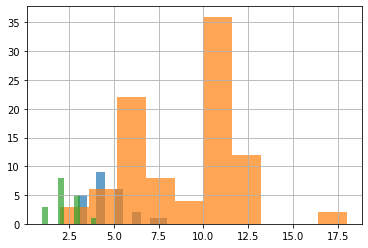

In [13]:
data[data["type"] == "Pairing"]['units'].hist(alpha=0.7)
data[data["type"] == "Studying"]['units'].hist(alpha=0.7)
data[data["type"] == "Coding"]['units'].hist(alpha=0.7)

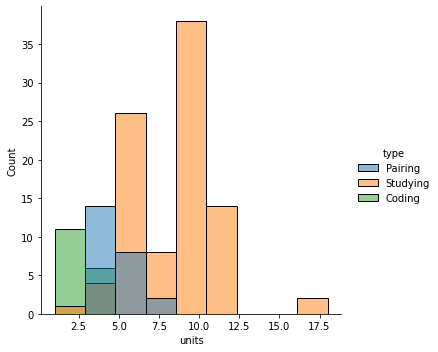

In [14]:
sns.displot(data, x="units", hue="type")

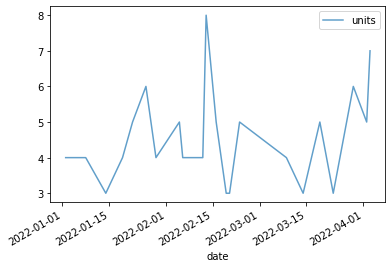

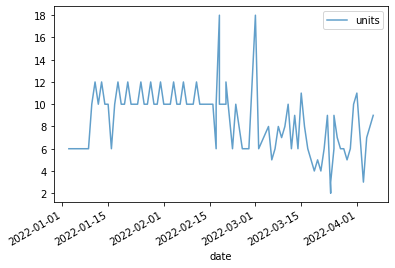

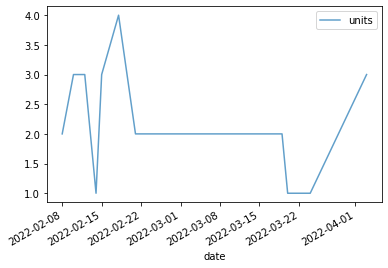

In [15]:
data[data["type"] == "Pairing"].plot(x='date', y='units', alpha=0.7)
data[data["type"] == "Studying"].plot(x='date', y='units', alpha=0.7)
data[data["type"] == "Coding"].plot(x='date', y='units', alpha=0.7)
plt.show()

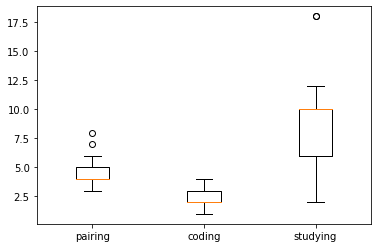

In [16]:
fig, ax = plt.subplots()
ax.boxplot([data[data["type"] == "Pairing"]['units'],\
           data[data["type"] == "Coding"]['units'],\
           data[data["type"] == "Studying"]['units']])
ax.set_xticklabels(["pairing", "coding", "studying"])
plt.show()
       

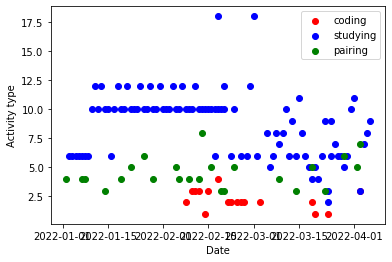

In [17]:
coding = data[data["type"] == "Coding"]
studying = data[data["type"] == "Studying"]
pairing = data[data["type"] == "Pairing"]

fig, ax = plt.subplots()
ax.scatter(coding["date"], coding["units"], color='red', label='coding')
ax.scatter(studying["date"], studying["units"], color='blue', label='studying')
ax.scatter(pairing["date"], pairing["units"], color='green', label='pairing')
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Activity type")
plt.show()


In [18]:
data[data["type"] == "Pairing"]
data[data["type"] == "Studying"]
data[data["type"] == "Coding"]

,date,type,platform,units,time_start,time_end
47,2022-02-08,Coding,exercism,2,NaN,NaN
51,2022-02-10,Coding,exercism,3,NaN,NaN
52,2022-02-11,Coding,exercism,3,NaN,NaN
56,2022-02-12,Coding,exercism,3,NaN,NaN
60,2022-02-14,Coding,exercism,1,NaN,NaN
62,2022-02-15,Coding,exercism,3,NaN,NaN
69,2022-02-18,Coding,exercism,4,NaN,NaN
75,2022-02-21,Coding,exercism,2,NaN,NaN
77,2022-02-22,Coding,exercism,2,NaN,NaN
80,2022-02-24,Coding,exercism,2,NaN,NaN


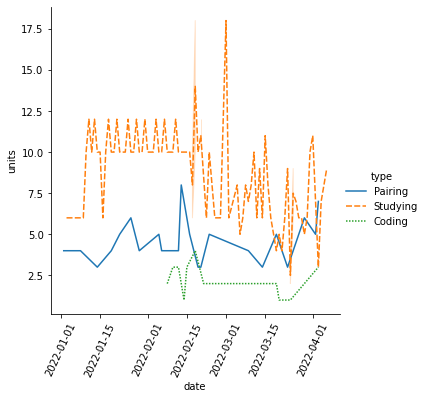

In [19]:
ax = sns.relplot(x="date", y="units", data=data, kind="line", style="type", hue="type")
ax.set_xticklabels(rotation=65)
plt.show()

In [20]:
data["cumulative_units"]= data["units"].cumsum()
print(data["cumulative_units"])


0        4
1       10
2       16
3       22
4       28
      ... 
130    926
131    929
132    936
133    944
134    953
Name: cumulative_units, Length: 135, dtype: int64


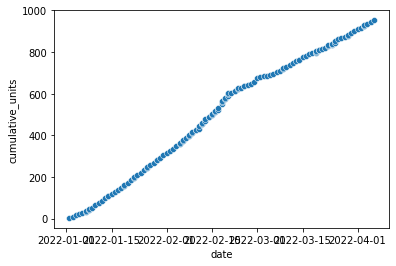

In [23]:
ax = sns.scatterplot(x="date", y="cumulative_units", data=data)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.show()